In [42]:
# Import all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import scipy.stats as st

# Read dataset from file in the same directory
df = pd.read_csv('anggur.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8


## 1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis.


In [43]:
# Melihat tipe data dan data null dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


#### Semua kolom data anggur sudah bersifat numerik

In [44]:
# Menghitung deskripsi statistika dari dataset
desc_stats_df = pd.DataFrame(columns=df.columns)
desc_stats_df.loc['Mean'] = df.mean()
desc_stats_df.loc['Modus'] = df.mode().loc[0]
desc_stats_df.loc['Std. Deviation'] = df.std()
desc_stats_df.loc['Variance'] = df.var()
desc_stats_df.loc['Minimum'] = df.min()
desc_stats_df.loc['Q1'] = df.quantile(0.25)
desc_stats_df.loc['Q2 (Median)'] = df.quantile(0.5)
desc_stats_df.loc['Q3'] = df.quantile(0.75)
desc_stats_df.loc['Maximum'] = df.max()
desc_stats_df.loc['Range'] = desc_stats_df.loc['Maximum'] - desc_stats_df.loc['Minimum']
desc_stats_df.loc['IQR'] = desc_stats_df.loc['Q3'] - desc_stats_df.loc['Q1']
desc_stats_df.loc['Skewness'] = df.skew()
desc_stats_df.loc['Kurtosis'] = df.kurtosis()
desc_stats_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Mean,7.152530,0.520839,0.270517,2.567104,0.081195,14.907679,40.290150,0.995925,3.303610,0.598390,10.592280,7.958000
Modus,6.540000,0.554600,0.301900,0.032555,0.015122,0.194679,35.200000,0.995900,3.340000,0.590000,9.860000,8.000000
Std. Deviation,1.201598,0.095848,0.049098,0.987915,0.020111,4.888100,9.965767,0.002020,0.104875,0.100819,1.510706,0.902802
Variance,1.443837,0.009187,0.002411,0.975977,0.000404,23.893519,99.316519,0.000004,0.010999,0.010164,2.282233,0.815051
Minimum,3.320000,0.139900,0.116700,0.032555,0.015122,0.194679,3.150000,0.988800,2.970000,0.290000,6.030000,5.000000
Q1,6.377500,0.456100,0.237800,1.896330,0.066574,11.426717,33.785000,0.994600,3.230000,0.530000,9.560000,7.000000
Q2 (Median),7.150000,0.524850,0.272200,2.519430,0.082167,14.860346,40.190000,0.996000,3.300000,0.595000,10.610000,8.000000
Q3,8.000000,0.585375,0.302325,3.220873,0.095312,18.313098,47.022500,0.997200,3.370000,0.670000,11.622500,9.000000
Maximum,11.490000,0.805100,0.409600,5.550755,0.140758,27.462525,69.960000,1.002600,3.710000,0.960000,15.020000,10.000000
Range,8.170000,0.665200,0.292900,5.518200,0.125635,27.267847,66.810000,0.013800,0.740000,0.670000,8.990000,5.000000


In [45]:
display(Markdown("##### Terdapat beberapa kolom dengan nilai modus yang lebih dari satu:"))

# Menghitung modus kolom yang lebih dari satu sebagai tambahan informasi
multi_modus = df.mode()
multi_modus = multi_modus.loc[:, pd.notna(multi_modus.loc[1])]
display(multi_modus)

##### Terdapat beberapa kolom dengan nilai modus yang lebih dari satu:

,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol
0,0.032555,0.015122,0.194679,35.20,0.9959,9.86
1,0.033333,0.020794,0.621628,37.25,0.9961,10.31
2,0.051774,0.024259,0.860177,39.64,0.9965,NaN
3,0.077156,0.027209,3.032139,40.61,0.9970,NaN
4,0.084744,0.032111,3.129885,41.05,NaN,NaN
...,...,...,...,...,...,...
995,5.210260,0.131425,26.630490,NaN,NaN,NaN
996,5.217429,0.133656,26.665773,NaN,NaN,NaN
997,5.252864,0.135368,26.822626,NaN,NaN,NaN
998,5.299524,0.135790,27.006307,NaN,NaN,NaN


## 2. Membuat visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik.

In [46]:
# Fungsi untuk menampilkan kolom data dalam bentuk histogram dan boxplot
def visualize_plot(column):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    axs[0].hist(df[column], color='#facf57', edgecolor='black')
    axs[0].set_title(column)

    axs[1].boxplot(df[column])
    axs[1].set_title(column)

    plt.show()

### Kolom Fixed Acidity

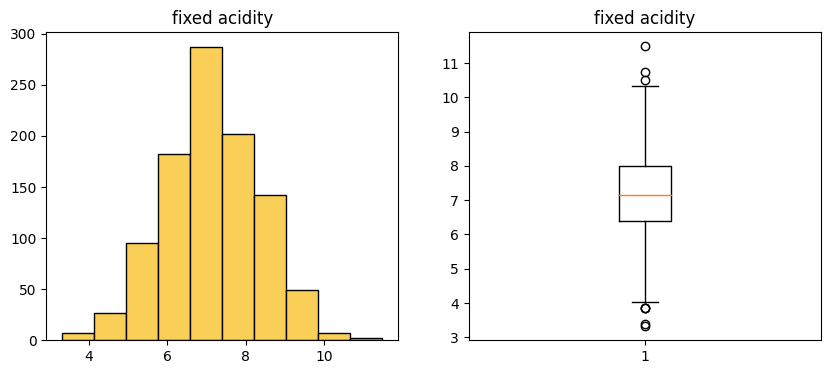

In [47]:
visualize_plot("fixed acidity")

Berdasarkan histogram dari kolom fixed acidity, data terdistribusi normal dan tidak condong ke arah kanan maupun kiri (*no skew*). Hal yang sama juga didukung dengan visualisasi boxplot dari kolom tersebut. Pada boxplot, garis median berada di tengah *box* dan *whisker* bagian atas serta bawah memiliki panjang yang relatif sama. Meskipun terdapat data *outlier* pada boxplot tersebut, jumlahnya sedikit serta cenderung terbagi rata pada bagian atas dan bawah *whisker*. Berdasarkan hal-hal tersebut, data pada boxplot juga menunjukkan data yang simetris dan terdistribusi normal.

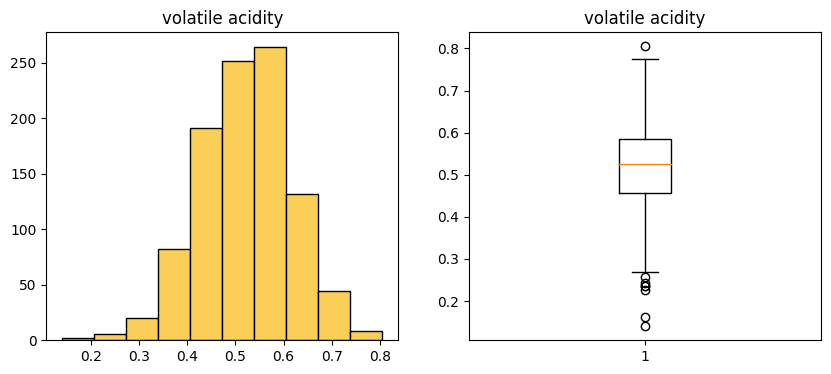

In [48]:
visualize_plot("volatile acidity")

Berdasarkan histogram dari kolom volatile acidity, data condong ke kiri (*negatively skewed*). Hal yang sama juga didukung dengan visualisasi boxplot dari kolom tersebut. Pada boxplot, garis median berada di tengah *box* dan *whisker* bagian bawah serta atas cenderung memiliki panjang yang sama. Namun, dapat diamati bahwa terdapat lebih banyak data *outlier* pada bagian bawah *whisker* dibandingkan bagian atas *whisker*. Berdasarkan hal tersebut, data pada boxplot juga menunjukkan data yang cenderung menjulur ke arah kiri (*negatively skewed*).

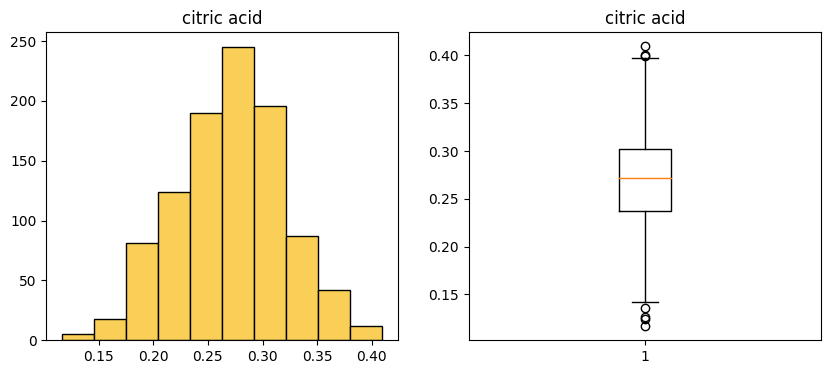

In [49]:
visualize_plot("citric acid")

Berdasarkan histogram dari kolom citric acid, data condong ke kiri (*negatively skewed*). Hal yang sama juga didukung dengan visualisasi boxplot dari kolom tersebut. Pada boxplot, garis median berada di tengah *box* dan *whisker* bagian bawah serta atas cenderung memiliki panjang yang sama. Namun, dapat diamati bahwa terdapat lebih banyak data *outlier* pada bagian bawah *whisker* dibandingkan bagian atas *whisker*. Berdasarkan hal tersebut, data pada boxplot juga menunjukkan data yang cenderung menjulur ke arah kiri (*negatively skewed*).

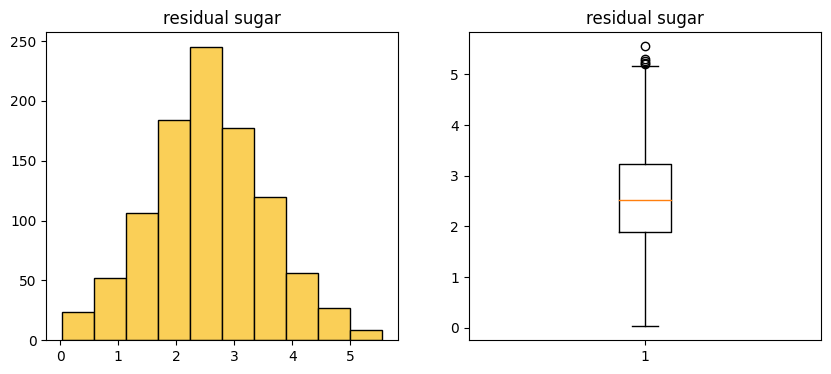

In [50]:
visualize_plot("residual sugar")

Berdasarkan histogram dari kolom residual sugar, data sedikit condong ke kanan (*positively skewed*). Hal yang sama juga didukung dengan visualisasi boxplot dari kolom tersebut. Pada boxplot, garis median berada di tengah *box* dan *whisker* bagian bawah serta atas cenderung memiliki panjang yang sama. Namun, dapat diamati bahwa terdapat banyak data *outlier* pada bagian atas *whisker*. Berdasarkan hal tersebut, data pada boxplot juga menunjukkan data yang cenderung menjulur ke arah kanan (*positively skewed*).

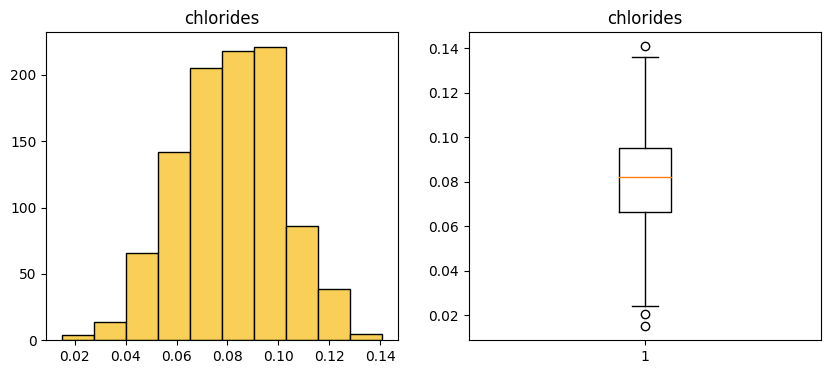

In [51]:
visualize_plot("chlorides")

Berdasarkan histogram dari kolom chlorides, data sedikit condong ke kiri (*negatively skewed*). Hal yang sama juga didukung dengan visualisasi boxplot dari kolom tersebut. Pada boxplot, garis median berada di tengah *box* dan *whisker* bagian bawah serta atas cenderung memiliki panjang yang sama. Namun, dapat diamati bahwa terdapat lebih banyak data *outlier* pada bagian bawah *whisker* dibandingkan bagian atas *whisker*. Berdasarkan hal tersebut, data pada boxplot juga menunjukkan data yang cenderung menjulur ke arah kiri (*negatively skewed*).

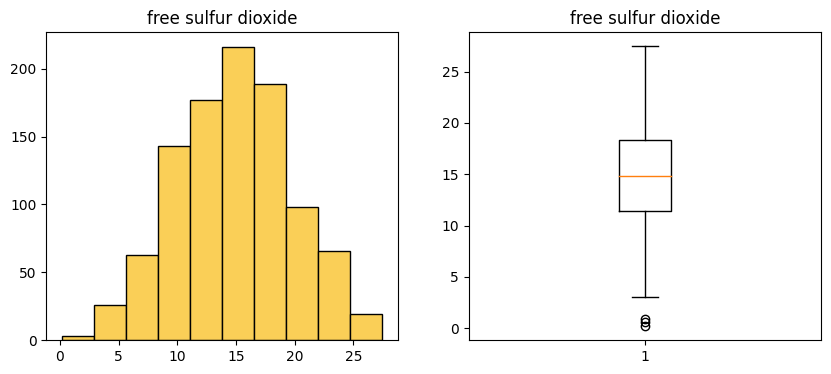

In [52]:
visualize_plot("free sulfur dioxide")

Berdasarkan histogram dari kolom free sulfur dioxide, data terdistribusi normal dan tidak condong ke arah kanan maupun kiri (*no skew*). Hal yang sama juga didukung dengan visualisasi boxplot dari kolom tersebut. Pada boxplot, garis median berada di tengah *box* dan *whisker* bagian atas serta bawah memiliki panjang yang relatif sama. Meskipun terdapat data *outlier* pada bagian bawah *whisker*, jumlahnya sedikit dan tidak memengaruhi distribusi data. Berdasarkan hal-hal tersebut, data pada boxplot juga menunjukkan data yang simetris dan terdistribusi normal.

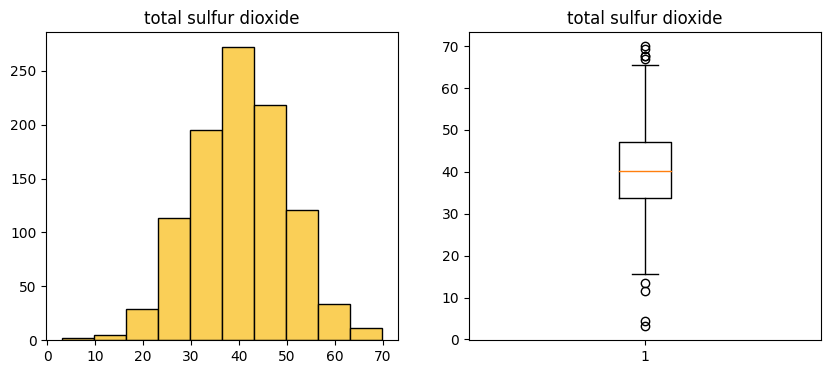

In [53]:
visualize_plot("total sulfur dioxide")

Berdasarkan histogram dari kolom total sulfur dioxide, data terdistribusi normal dan tidak condong ke arah kanan maupun kiri (*no skew*). Hal yang sama juga didukung dengan visualisasi boxplot dari kolom tersebut. Pada boxplot, garis median berada di tengah *box* dan *whisker* bagian atas serta bawah memiliki panjang yang relatif sama. Meskipun terdapat data *outlier* pada boxplot tersebut, jumlahnya sedikit serta cenderung terbagi rata pada bagian atas dan bawah *whisker*. Berdasarkan hal-hal tersebut, data pada boxplot juga menunjukkan data yang simetris dan terdistribusi normal.

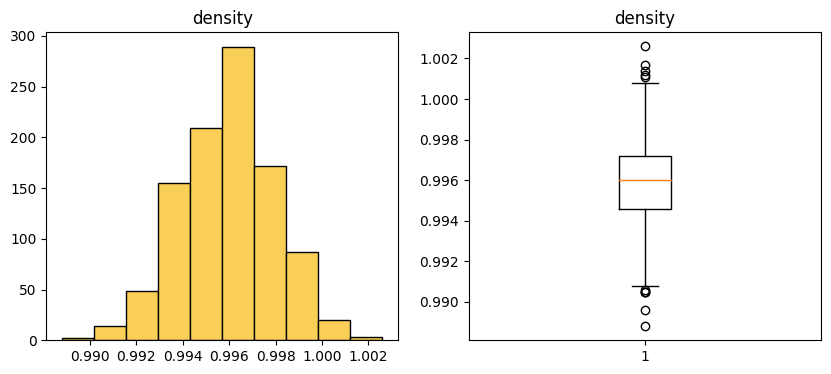

In [54]:
visualize_plot("density")

Berdasarkan histogram dari kolom density, data sedikit condong ke kiri (*negatively skewed*). Hal yang sama juga didukung dengan visualisasi boxplot dari kolom tersebut. Pada boxplot, garis median berada di tengah *box* dan *whisker* bagian bawah serta atas cenderung memiliki panjang yang sama. Namun, dapat diamati bahwa terdapat lebih banyak data *outlier* pada bagian bawah *whisker* dibandingkan bagian atas *whisker*. Berdasarkan hal tersebut, data pada boxplot juga menunjukkan data yang cenderung menjulur ke arah kiri (*negatively skewed*).

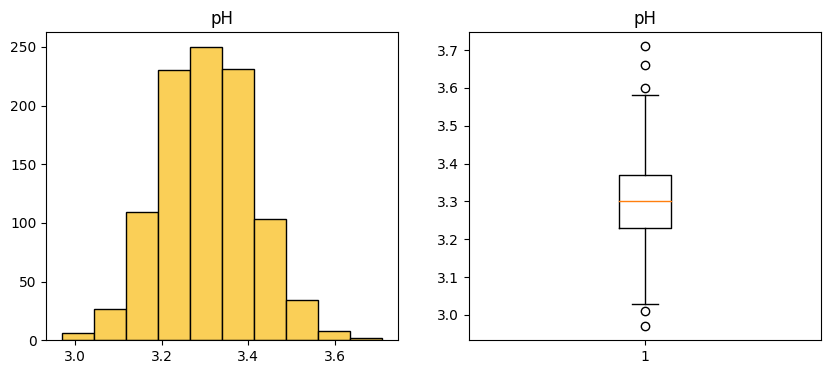

In [55]:
visualize_plot("pH")

Berdasarkan histogram dari kolom sulphates, data condong ke kanan (*positively skewed*). Hal yang sama juga didukung dengan visualisasi boxplot dari kolom tersebut. Pada boxplot, garis median berada di tengah *box* dan *whisker* bagian bawah serta atas cenderung memiliki panjang yang sama. Namun, dapat diamati bahwa terdapat lebih banyak data *outlier* pada bagian atas *whisker* dibandingkan bagian bawah *whisker*. Berdasarkan hal tersebut, data pada boxplot juga menunjukkan data yang cenderung menjulur ke arah kanan (*positively skewed*).

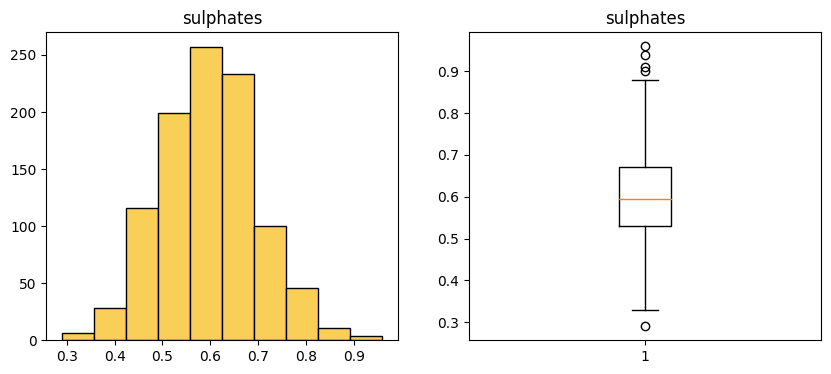

In [56]:
visualize_plot("sulphates")

Berdasarkan histogram dari kolom sulphates, data condong ke kanan (*positively skewed*). Hal yang sama juga didukung dengan visualisasi boxplot dari kolom tersebut. Pada boxplot, garis median berada di tengah *box* dan *whisker* bagian bawah serta atas cenderung memiliki panjang yang sama. Namun, dapat diamati bahwa terdapat lebih banyak data *outlier* pada bagian atas *whisker* dibandingkan bagian bawah *whisker*. Berdasarkan hal tersebut, data pada boxplot juga menunjukkan data yang cenderung menjulur ke arah kanan (*positively skewed*).

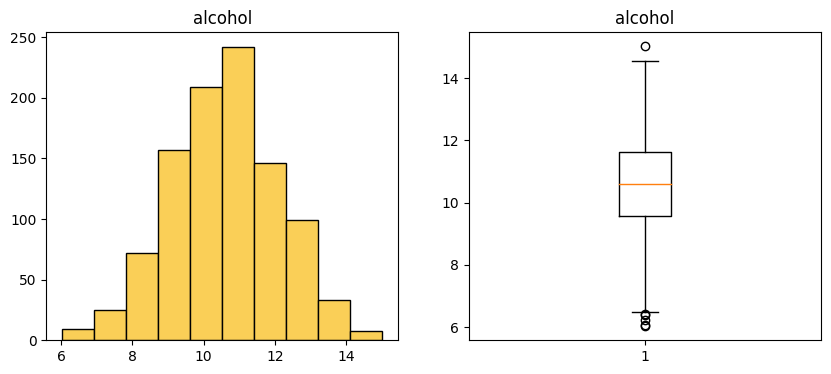

In [57]:
visualize_plot("alcohol")

Berdasarkan histogram dari kolom alcohol, data condong ke kiri (*negatively skewed*). Hal yang sama juga didukung dengan visualisasi boxplot dari kolom tersebut. Pada boxplot, garis median berada di tengah *box* dan *whisker* bagian bawah serta atas cenderung memiliki panjang yang sama. Namun, dapat diamati bahwa terdapat lebih banyak data *outlier* pada bagian bawah *whisker* dibandingkan bagian atas *whisker*. Berdasarkan hal tersebut, data pada boxplot juga menunjukkan data yang cenderung menjulur ke arah kiri (*negatively skewed*).

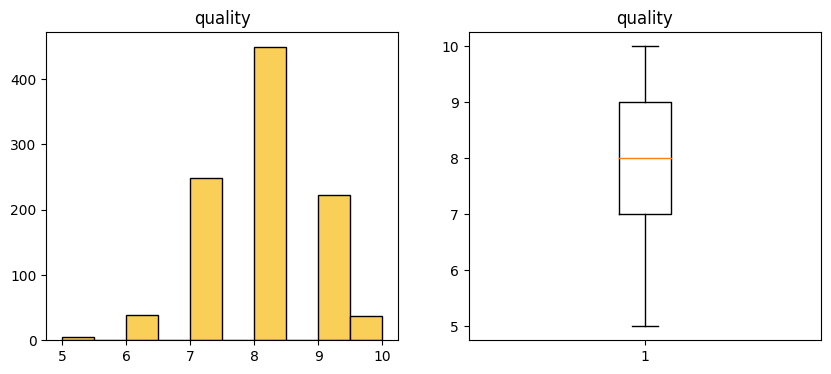

In [58]:
visualize_plot("quality")

Berdasarkan histogram dari kolom quality, data condong ke kiri (*negatively skewed*). Hal yang sama juga didukung dengan visualisasi boxplot dari kolom tersebut. Pada boxplot, garis median berada di tengah *box*, tetapi *whisker* bagian bawah jauh lebih panjang dibanding bagian atas. Berdasarkan hal tersebut, data pada boxplot juga menunjukkan data yang cenderung menjulur ke arah kiri (*negatively skewed*). Pada boxplot juga dapat diamati bahwa kolom quality tidak memiliki data *outlier* yang menjadi salah satu penanda data sampel yang baik.

## 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak.

In [59]:
# Fungsi melakukan perhitungan normal test untuk mengecek distribusi normal suatu kolom
def norm_test(col):
    _, p = st.normaltest(df[col])

    display(Markdown(f"Didapatkan nilai <i>p-value</i>: <br> $$p = {p}$$"))
    if (p < 0.05):
        display(Markdown(f"Data kolom \"{col}\" <u>tidak berdistribusi normal</u> karena <i>p-value</i> yang kurang dari $\\alpha = 0.05$ ($p < 0.05$)"))
    else:
        display(Markdown(f"Data kolom \"{col}\" <u>tidak dapat disimpulkan bahwa tidak berdistribusi normal</u> karena <i>p-value</i> yang lebih dari $\\alpha = 0.05$ ($p \geq 0.05$)"))

    # Fit a normal distribution to
    # the data:
    # mean and standard deviation
    mu, std = st.norm.fit(df[col])

    plt.hist(df[col], color='#6decf7',bins=25, density=True)
    
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = st.norm.pdf(x, mu, std)

    plt.plot(x, p, 'k')
    plt.show()

Normality test dilakukan untuk mengetes null hypothesis bahwa suatu sampel berdistribusi normal atau tidak. Dalam percobaan kami kami menggunakan nilai signifikan $\alpha = 0.05$. Apabila <i>p-value</i> yang ditemukan lebih kecil dari $\alpha$, dapat disimpulkan bahwa sampel tersebut tidak normal ($H_0$ ditolak). Apabila <i>p-value</i> yang ditemukan lebih besar dari $\alpha$, tidak dapat disimpulkan bahwa sampel tersebut normal. Oleh karena itu, sampel dengan <i>p-value</i> kurang dari $\alpha$ dipastikan tidak normal, sedangkan jika <i>p-value</i> lebih dari $\alpha$ <u>tidak bisa dipastikan</u> tidak normal.

<i>p-value</i> ditemukan menggunakan fungsi dari library scipy yang menggunakan test `D’Agostino` and `Pearson’s` yang menggunakan skew dan kurtosis untuk menyimpulkan normalitas

### a. Normality test kolom "fixed acidity"

Didapatkan nilai <i>p-value</i>: <br> $$p = 0.9308584274486692$$

Data kolom "fixed acidity" <u>tidak dapat disimpulkan bahwa tidak berdistribusi normal</u> karena <i>p-value</i> yang lebih dari $\alpha = 0.05$ ($p \geq 0.05$)

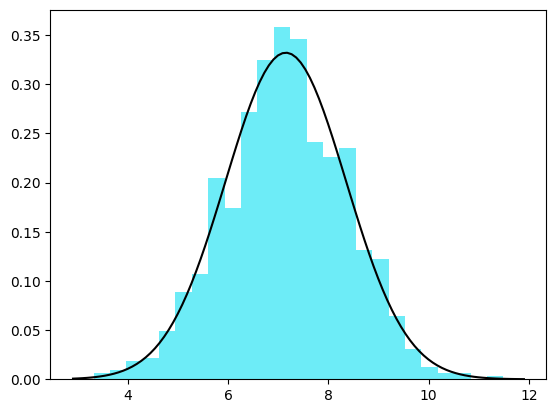

### b. Normality test kolom "volatile acidity"

Didapatkan nilai <i>p-value</i>: <br> $$p = 0.022581461594113835$$

Data kolom "volatile acidity" <u>tidak berdistribusi normal</u> karena <i>p-value</i> yang kurang dari $\alpha = 0.05$ ($p < 0.05$)

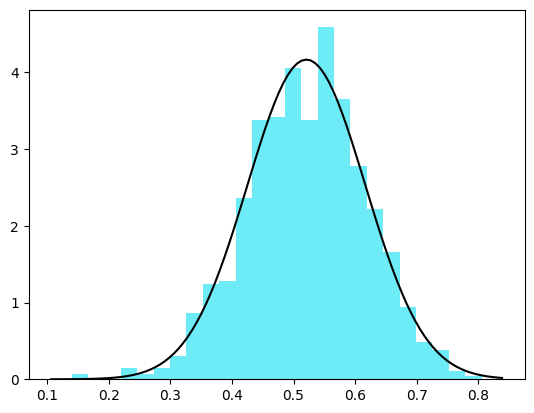

### c. Normality test kolom "citric acid"

Didapatkan nilai <i>p-value</i>: <br> $$p = 0.6816899375976969$$

Data kolom "citric acid" <u>tidak dapat disimpulkan bahwa tidak berdistribusi normal</u> karena <i>p-value</i> yang lebih dari $\alpha = 0.05$ ($p \geq 0.05$)

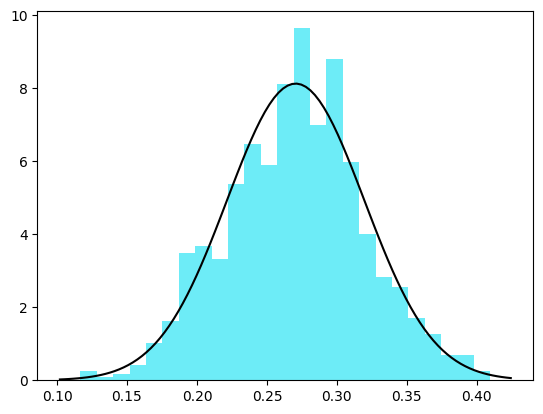

### d. Normality test kolom "residual sugar"

Didapatkan nilai <i>p-value</i>: <br> $$p = 0.2246670329548379$$

Data kolom "residual sugar" <u>tidak dapat disimpulkan bahwa tidak berdistribusi normal</u> karena <i>p-value</i> yang lebih dari $\alpha = 0.05$ ($p \geq 0.05$)

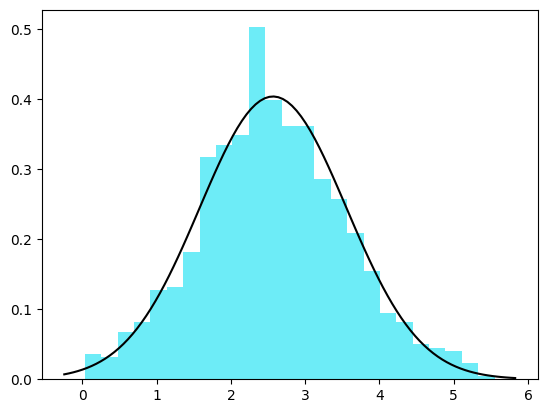

### e. Normality test kolom "chlorides"

Didapatkan nilai <i>p-value</i>: <br> $$p = 0.17048273416248416$$

Data kolom "chlorides" <u>tidak dapat disimpulkan bahwa tidak berdistribusi normal</u> karena <i>p-value</i> yang lebih dari $\alpha = 0.05$ ($p \geq 0.05$)

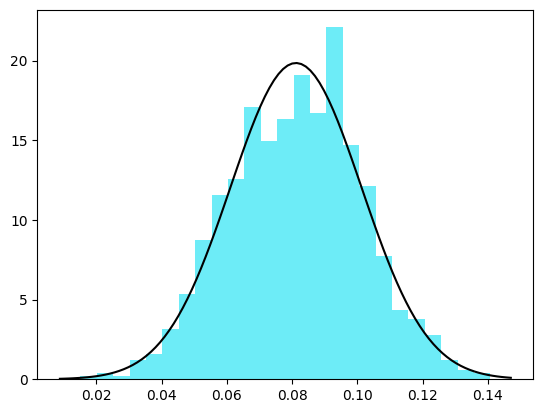

### f. Normality test kolom "free sulfur dioxide"

Didapatkan nilai <i>p-value</i>: <br> $$p = 0.017430434445255643$$

Data kolom "free sulfur dioxide" <u>tidak berdistribusi normal</u> karena <i>p-value</i> yang kurang dari $\alpha = 0.05$ ($p < 0.05$)

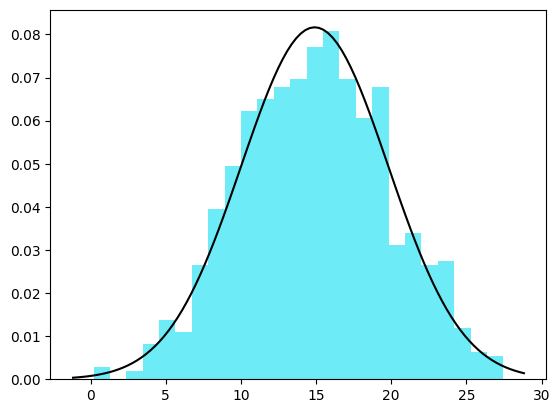

### g. Normality test kolom "total sulfur dioxide"

Didapatkan nilai <i>p-value</i>: <br> $$p = 0.8488846101395726$$

Data kolom "total sulfur dioxide" <u>tidak dapat disimpulkan bahwa tidak berdistribusi normal</u> karena <i>p-value</i> yang lebih dari $\alpha = 0.05$ ($p \geq 0.05$)

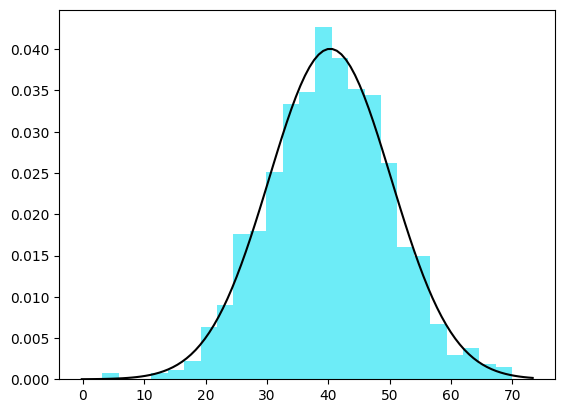

### h. Normality test kolom "density"

Didapatkan nilai <i>p-value</i>: <br> $$p = 0.5985227325531981$$

Data kolom "density" <u>tidak dapat disimpulkan bahwa tidak berdistribusi normal</u> karena <i>p-value</i> yang lebih dari $\alpha = 0.05$ ($p \geq 0.05$)

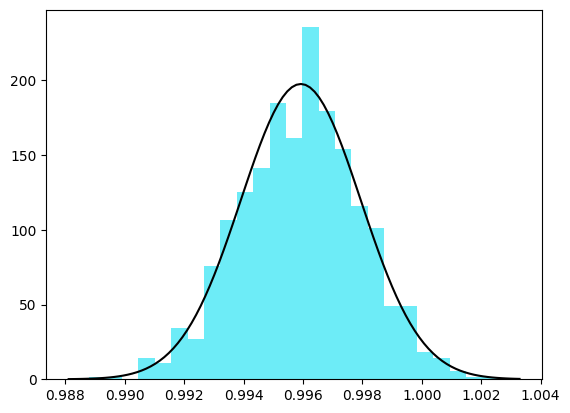

### i. Normality test kolom "pH"

Didapatkan nilai <i>p-value</i>: <br> $$p = 0.13678740824860436$$

Data kolom "pH" <u>tidak dapat disimpulkan bahwa tidak berdistribusi normal</u> karena <i>p-value</i> yang lebih dari $\alpha = 0.05$ ($p \geq 0.05$)

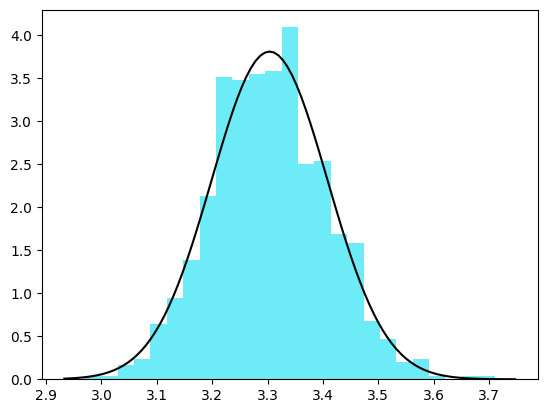

### j. Normality test kolom "sulphates"

Didapatkan nilai <i>p-value</i>: <br> $$p = 0.13884318628391681$$

Data kolom "sulphates" <u>tidak dapat disimpulkan bahwa tidak berdistribusi normal</u> karena <i>p-value</i> yang lebih dari $\alpha = 0.05$ ($p \geq 0.05$)

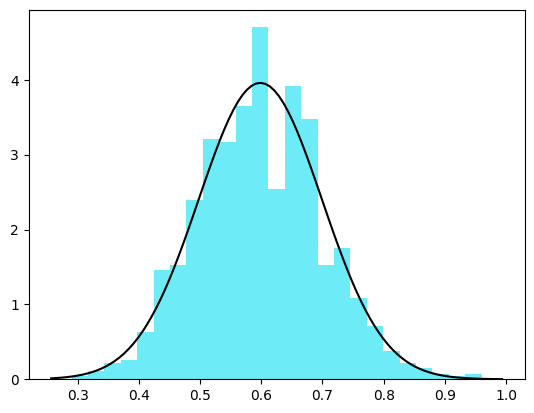

### k. Normality test kolom "alcohol"

Didapatkan nilai <i>p-value</i>: <br> $$p = 0.6790884901361043$$

Data kolom "alcohol" <u>tidak dapat disimpulkan bahwa tidak berdistribusi normal</u> karena <i>p-value</i> yang lebih dari $\alpha = 0.05$ ($p \geq 0.05$)

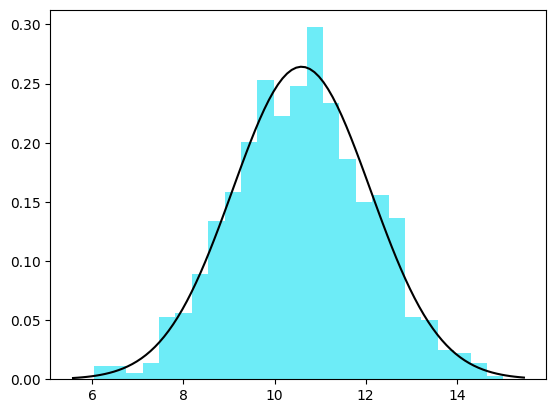

### l. Normality test kolom "quality"

Didapatkan nilai <i>p-value</i>: <br> $$p = 0.3888139394184818$$

Data kolom "quality" <u>tidak dapat disimpulkan bahwa tidak berdistribusi normal</u> karena <i>p-value</i> yang lebih dari $\alpha = 0.05$ ($p \geq 0.05$)

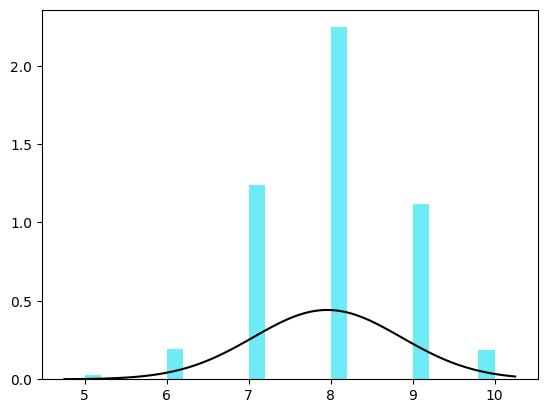

In [60]:
for idx, column in enumerate(df):
    display(Markdown(f"### {chr(ord('a') + idx)}. Normality test kolom \"{column}\""))
    norm_test(column)

In [61]:
# Fungsi-fungsi dalam pengambilan keputusan melalui hipotesis

# Konversi nilai p-value menjadi z-value
def p_to_z(p):
  return st.norm.ppf(p)
# Konversi nilai z-value menjadi p-value
def z_to_p(z):
  return st.norm.cdf(z)
# Fungsi untuk menghitung z-value pada 1 sampel
def calculate_z_one_sample(x_bar, mean, std, n):
  return (x_bar-mean) * (n**(0.5)) / std
# Funsi untuk menghitung z-value pada 2 sampel yang diketahui variansinya
def calculate_z_two_sample(x_bar1, x_bar2, d0, var1, var2, n1, n2):
  return (x_bar1 - x_bar2 - d0) / (((var1/n1) + (var2/n2)) ** 0.5)

## 4. Melakukan test hipotesis 1 sampel

### a. Nilai rata-rata pH di atas 3.29?

1. Hipotesis nol
$$ H_0: μ = 3.29$$
2. Hipotesis alternatif
$$ H_1: μ > 3.29$$
3. Tingkat signifikan
$$α = 0.05$$
4. Uji statistik
<br> Digunakan pengujian dengan one-tailed test untuk satu sampel dengan variansi yang diketahui. Nilai z dapat diperoleh sebagai berikut:
$$z = \frac{\bar{x} - μ_0}{σ/\sqrt{n}} $$
&emsp;&emsp; Dengan critical region:
$$ z > z_{\alpha} $$

In [62]:
# Perhitungan batas nilai critical region
z_critical = p_to_z(1 - 0.05)

display(Markdown(f"Didapatkan nilai critical region: <br>$z > {z_critical:.3f} $"))

Didapatkan nilai critical region: <br>$z > 1.645 $

5. Perhitungan nilai uji statistik dan <i>p-value<i>

In [63]:
# Perhitungan data statistik sample
x_bar = df['pH'].mean()
mu = 3.29
sigma = df['pH'].std()
n = df['pH'].count()

# Nilai z data sample
z_value = calculate_z_one_sample(x_bar, mu, sigma, n)
# Nilai p data sample
p_value = 1 - z_to_p(z_value)

# Menampilkan hasil perhitungan
display(Markdown(f"Diketahui: <br> $\\bar{{x}} = {x_bar}$ &emsp; $\\mu = {mu}$ <br> $\\sigma = {sigma:.5f}$ &emsp; $n = {n}$"))
display(Markdown(f"Didapatkan nilai: <br>$z = {z_value:.5f} $ <br> $p = {p_value} $"))

Diketahui: <br> $\bar{x} = 3.30361$ &emsp; $\mu = 3.29$ <br> $\sigma = 0.10488$ &emsp; $n = 1000$

Didapatkan nilai: <br>$z = 4.10378 $ <br> $p = 2.032263004325685e-05 $

6. Pengambilan keputusan
<br> Karena $z = 4.10378 > z_{\alpha}$, $z$ berada di critical section sehingga <u>hipotesis $H_0$ ditolak</u>. 
<br> Dengan tes signifikan, disimpulkan bahwa <u>hipotesis $H_0$ ditolak</u> karena <i>p-value</i> lebih kecil dari nilai signifikan yang ditetapkan ($p < 0.05$).
<br> Dapat disimpulkan bahwa rata-rata pH lebih besar dari 3.29.

### b. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?

1. Hipotesis nol
$$H_0: μ = 2.50$$
2. Hipotesis alternatif
$$H_1: μ \neq 2.50 \quad (\mu < 2.50 \quad atau \quad \mu > 2.50) $$
3. Tingkat signifikan
$$α = 0.05$$
4. Uji statistik 
<br> Digunakan pengujian dengan two-tailed test untuk satu sampel dengan variansi yang diketahui. Nilai z dapat diperoleh sebagai berikut:
$$z = \frac{\bar{x} - μ_0}{σ/\sqrt{n}} $$
&emsp;&emsp; Dengan critical region:
$$ z < -z_{\alpha/2} \quad atau \quad z > z_{\alpha/2} $$
$$ z < -1.96 \quad atau \quad z > 1.96 $$
5. Dapat dihitung:

In [64]:
# Perhitungan batas nilai critical region
z_critical_lower = p_to_z(0.05/2)
z_critical_upper = p_to_z(1 - (0.05/2))

display(Markdown(f"Didapatkan nilai critical region: <br>$z < {z_critical_lower:.3f} $ &emsp; atau &emsp; $z > {z_critical_upper:.3f} $"))

Didapatkan nilai critical region: <br>$z < -1.960 $ &emsp; atau &emsp; $z > 1.960 $

5. Perhitungan nilai uji statistik dan <i>p-value<i>

In [65]:
# Perhitungan data statistik sample
x_bar = df['residual sugar'].mean()
mu = 2.5
sigma = df['residual sugar'].std()
n = df['residual sugar'].count()

# Nilai z data sample
z_value = (x_bar - mu) * (n**(0.5)) / (sigma)
# Nilai p data sample
p_value = 2*(1 - st.norm.cdf(z_value))

display(Markdown(f"Diketahui: <br> $\\bar{{x}} = {x_bar: .5f}$ &emsp; $\\mu = {mu}$ <br> $\\sigma = {sigma:.5f}$ &emsp; $n = {n}$"))
display(Markdown(f"Didapatkan nilai: <br>$z = {z_value:.5f} $ <br> $p = {p_value: .5f} $"))

Diketahui: <br> $\bar{x} =  2.56710$ &emsp; $\mu = 2.5$ <br> $\sigma = 0.98792$ &emsp; $n = 1000$

Didapatkan nilai: <br>$z = 2.14796 $ <br> $p =  0.03172 $

6. Pengambilan keputusan
<br> Karena $z = 2.14796 > z_{\alpha/2}$, $z$ berada di critical section sehingga <u>hipotesis $H_0$ ditolak</u>. 
<br> Dengan tes signifikan, disimpulkan bahwa <u>hipotesis $H_0$ ditolak</u> karena <i>p-value</i> lebih kecil dari nilai signifikan yang ditetapkan ($p < 0.05$).
<br> Dapat disimpulkan bahwa nilai residual sugar tidak sama dengan 2.148.

### c. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?

1. Hipotesis nol
$$H_0: μ = 0.65$$
2. Hipotesis alternatif
$$H_1: μ \neq 0.65 \quad (\mu < 0.65 \quad atau \quad \mu > 0.65)$$
3. Tingkat signifikan
$$α = 0.05$$
4. Uji statistik
<br> Digunakan pengujian dengan two-tailed test untuk satu sampel dengan variansi yang diketahui. Nilai z dapat diperoleh sebagai berikut: 
$$z = \frac{\bar{x} - μ_0}{σ/\sqrt{n}} $$
&emsp;&emsp; Dengan critical region:
$$ z < -z_{\alpha/2} \quad atau \quad z > z_{\alpha/2} $$

In [66]:
# Perhitungan batas nilai critical region
z_critical_lower = p_to_z(0.05/2)
z_critical_upper = p_to_z(1 - (0.05/2))

display(Markdown(f"Didapatkan nilai critical region: <br>$z < {z_critical_lower:.3f} $ &emsp; atau &emsp; $z > {z_critical_upper:.3f} $"))

Didapatkan nilai critical region: <br>$z < -1.960 $ &emsp; atau &emsp; $z > 1.960 $

5. Perhitungan nilai uji statistik dan <i>p-value<i>

In [67]:
# Perhitungan data statistik sample
x_bar = df.loc[:149, 'sulphates'].mean()
mu = 0.65
sigma = df.loc[:149, 'sulphates'].std()
n = df.loc[:149, 'sulphates'].count()

# Nilai z data sample
z_value = (x_bar - mu) * (n**(0.5)) / (sigma)
# Nilai p data sample
p_value = 2*(1 - st.norm.cdf(abs(z_value)))

display(Markdown(f"Diketahui: <br> $\\bar{{x}} = {x_bar: .5f}$ &emsp; $\\mu = {mu}$ <br> $\\sigma = {sigma:.5f}$ &emsp; $n = {n}$"))
display(Markdown(f"Didapatkan nilai: <br>$z = {z_value:.5f} $ <br> $p = {p_value: .5f} $"))

Diketahui: <br> $\bar{x} =  0.60587$ &emsp; $\mu = 0.65$ <br> $\sigma = 0.10887$ &emsp; $n = 150$

Didapatkan nilai: <br>$z = -4.96484 $ <br> $p =  0.00000 $

6. Pengambilan keputusan
<br> Karena $z = -4.96484 < z_{\alpha/2}$, $z$ berada di critical section sehingga <u>hipotesis $H_0$ ditolak</u>. 
<br> Dengan tes signifikan, disimpulkan bahwa <u>hipotesis $H_0$ ditolak</u> karena <i>p-value</i> lebih kecil dari nilai signifikan yang ditetapkan ($p < 0.05$).
<br> Dapat disimpulkan bahwa nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65.

### d. Nilai rata-rata total sulfur dioxide di bawah 35?

1. Hipotesis nol
$$H_0: μ = 35$$
2. Hipotesis alternatif
$$H_1: \mu < 35$$
3. Tingkat signifikan
$$α = 0.05$$
4. Uji statistik
<br> Digunakan pengujian dengan one-tailed test untuk satu sampel dengan variansi yang diketahui. Nilai z dapat diperoleh sebagai berikut: 
$$z = \frac{\bar{x} - μ_0}{σ/\sqrt{n}} $$
&emsp;&emsp; Dengan critical region:
$$ z < -z_{\alpha}$$

In [68]:
# Perhitungan batas nilai critical region
z_critical = -p_to_z(1 - 0.05)

display(Markdown(f"Didapatkan nilai critical region: <br>$z < {z_critical:.3f} $"))

Didapatkan nilai critical region: <br>$z < -1.645 $

5. Perhitungan nilai uji statistik dan <i>p-value<i>

In [69]:
# Perhitungan data statistik sample
x_bar = df['total sulfur dioxide'].mean()
mu = 35
sigma = df['total sulfur dioxide'].std()
n = df['total sulfur dioxide'].count()

# Nilai z data sample
z_value = (x_bar - mu) * (n**(0.5)) / (sigma)
# Nilai p data sample
p_value = st.norm.cdf(z_value)

display(Markdown(f"Diketahui: <br> $\\bar{{x}} = {x_bar: .5f}$ &emsp; $\\mu = {mu}$ <br> $\\sigma = {sigma:.5f}$ &emsp; $n = {n}$"))
display(Markdown(f"Didapatkan nilai: <br>$z = {z_value:.5f} $ <br> $p = {p_value: .5f} $"))

Diketahui: <br> $\bar{x} =  40.29015$ &emsp; $\mu = 35$ <br> $\sigma = 9.96577$ &emsp; $n = 1000$

Didapatkan nilai: <br>$z = 16.78639 $ <br> $p =  1.00000 $

6. Pengambilan keputusan
<br> Karena $z = 16.78639 > -z_{\alpha}$, $z$ tidak berada di critical section sehingga <u>hipotesis $H_0$ tidak ditolak</u>. 
<br> Dengan tes signifikan, disimpulkan juga bahwa <u>hipotesis $H_0$ tidak ditolak</u> karena <i>p-value</i> lebih besar dari nilai signifikan yang ditetapkan ($p > 0.05$).
<br> Tidak dapat disimpulkan bahwa nilai rata-rata total sulfur dioxide di bawah 35.

### e. Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50%?

1. Hipotesis nol
$$H_0: p = 0.5$$
2. Hipotesis alternatif
$$H_1: p \neq 0.5 \quad (p < 0.5 \quad atau \quad p > 0.5)$$
3. Tingkat signifikan
$$α = 0.05$$
4. Uji statistik
<br> Digunakan pengujian dengan two-tailed test untuk satu sampel dengan aproksimasi normal. Nilai z dapat diperoleh sebagai berikut: 
$$z = \frac{\hat{p} - p_0}{\sqrt{p_0q_0/n}} $$
&emsp;&emsp; Dengan critical region:
$$ z < -z_{\alpha/2} \quad atau \quad z > z_{\alpha/2} $$

In [70]:
# Perhitungan batas nilai critical region
z_critical_lower = p_to_z(0.05/2)
z_critical_upper = p_to_z(1 - (0.05/2))

display(Markdown(f"Didapatkan nilai critical region: <br>$z < {z_critical_lower:.3f} $ &emsp; $z > {z_critical_upper:.3f} $"))

Didapatkan nilai critical region: <br>$z < -1.960 $ &emsp; $z > 1.960 $

5. Perhitungan nilai uji statistik dan <i>p-value<i>

In [71]:
# Perhitungan data statistik sample
p_0 = 0.5
q_0 = 1 - p_0
n = df['total sulfur dioxide'].count()
p_hat = df.loc[df['total sulfur dioxide'] > 40]['total sulfur dioxide'].count() / n

# Nilai z data sample
z_value = (p_hat - p_0) * (n ** 0.5) / ((p_0 * q_0) ** 0.5)
# Nilai p data sample
p_value = 2 * (1 - st.norm.cdf(abs(z_value)))

display(Markdown(f"Diketahui: <br> $p_0 = {p_0}$ &emsp; $q_0 = {q_0}$ <br> $n = {n}$ &emsp; $\\hat{{p}} = {p_hat: .5f}$"))
display(Markdown(f"Didapatkan nilai: <br>$z = {z_value:.5f} $ <br> $p = {p_value :.5f} $"))

Diketahui: <br> $p_0 = 0.5$ &emsp; $q_0 = 0.5$ <br> $n = 1000$ &emsp; $\hat{p} =  0.51200$

Didapatkan nilai: <br>$z = 0.75895 $ <br> $p = 0.44788 $

6. Pengambilan keputusan
<br> Karena $-z_{\alpha/2} < z = 0.75895 < z_{\alpha/2}$, $z$ tidak berada di critical section sehingga <u>hipotesis $H_0$ tidak ditolak</u>. 
<br> Dengan tes signifikan, disimpulkan juga bahwa <u>hipotesis $H_0$ tidak ditolak</u> karena <i>p-value</i> lebih besar dari nilai signifikan yang ditetapkan ($p > 0.05$).
<br> Tidak dapat disimpulkan bahwa proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50%.

## 5. Melakukan test hipotesis 2 sampel

### a. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

1. Hipotesis nol
$$H_0: \mu_1 - \mu_2 = 0$$
2. Hipotesis alternatif
$$H_1: \mu_1 - \mu_2 \neq 0$$
3. Tingkat signifikan
$$α = 0.05$$
4. Uji statistik 
<br>Digunakan uji two-tailed test mean. Karena $n > 30$ dan kolom terdistribusi normal nilai s dapat digunakan sebagai $\sigma$. Digunakan rumus z sebagai berikut:
$$z = \frac{\bar{x}_1 - \bar{x}_2 - d_0}{\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}} $$
&emsp;&emsp; Dengan critical region:
$$ z < -z_{\alpha/2} \quad atau \quad z > z_{\alpha/2} $$

In [72]:
# Perhitungan batas nilai critical region
z_critical_lower = p_to_z(0.05/2)
z_critical_upper = p_to_z(1 - (0.05/2))

display(Markdown(f"Didapatkan nilai critical region: <br>$z < {z_critical_lower:.3f} $ &emsp; $z > {z_critical_upper:.3f} $"))

Didapatkan nilai critical region: <br>$z < -1.960 $ &emsp; $z > 1.960 $

5. Perhitungan nilai uji statistik dan <i>p-value<i>

In [73]:
# Pemilihan data sampel
bagian1 = df["fixed acidity"].head(len(df) // 2)
bagian2 = df["fixed acidity"].tail(len(df) // 2)

# Perhitungan data statistik sample
x_bar1 = bagian1.mean()
x_bar2 = bagian2.mean()
d0 = 0

var1 = bagian1.var()
var2 = bagian2.var()
n1 = len(bagian1)
n2 = len(bagian2)

# Nilai z data sample
z_value = calculate_z_two_sample(x_bar1, x_bar2, d0, var1, var2, len(bagian1), len(bagian2))
# Nilai p data sample
p_value = 2 * (1 - z_to_p(abs(z_value)))

display(Markdown(f"Diketahui: <br> $\\bar{{x}}_1 = {x_bar1: .5f}$ &emsp; $\\bar{{x}}_2 = {x_bar2: .5f}$ <br> $\\sigma_1^2 = {var1: .5f}$ &emsp; $\\sigma_2^2 = {var2:.5f}$ <br>  $n_1 = {n1}$ &emsp; $n_2 = {n2}$"))
display(Markdown(f"Didapatkan nilai: <br>$z = {z_value:.5f} $ <br> $p = {p_value: .5f} $"))

Diketahui: <br> $\bar{x}_1 =  7.15352$ &emsp; $\bar{x}_2 =  7.15154$ <br> $\sigma_1^2 =  1.45188$ &emsp; $\sigma_2^2 = 1.43868$ <br>  $n_1 = 500$ &emsp; $n_2 = 500$

Didapatkan nilai: <br>$z = 0.02604 $ <br> $p =  0.97922 $

6. Pengambilan keputusan
<br> Karena $z = 0.02604$, $z$ tidak berada di critical section sehingga <u>hipotesis $H_0$ tidak ditolak</u>. 
<br> Dengan tes signifikan, disimpulkan juga bahwa <u>hipotesis $H_0$ tidak ditolak</u> karena <i>p-value</i> lebih besar dari nilai signifikan yang ditetapkan ($p > 0.05$).
<br> Dapat disimpulkan bahwa nilai rata-rata kedua bagian sama.

### b. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?

1. Hipotesis nol
$$H_0: \mu_1 - \mu_2 = 0.001$$
2. Hipotesis alternatif
$$H_1: \mu_1 - \mu_2 > 0.001$$
3. Tingkat signifikan
$$α = 0.05$$
4. Uji statistik 
<br> Digunakan uji one-tailed test mean. Karena $n > 30$ dan kolom terdistribusi normal nilai s dapat digunakan sebagai $\sigma$. Digunakan rumus z sebagai berikut:
$$z = \frac{\bar{x}_1 - \bar{x}_2 - d_0}{\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}} $$
&emsp;&emsp; Dengan critical region:
$$ z > z_{\alpha} $$
$$ z > 1.645 $$
5. Dapat dihitung:

In [74]:
# Perhitungan batas nilai critical region
z_critical = p_to_z(1 - 0.05)

display(Markdown(f"Didapatkan nilai critical region: <br>$z > {z_critical:.3f} $"))

Didapatkan nilai critical region: <br>$z > 1.645 $

5. Perhitungan nilai uji statistik dan <i>p-value<i>

In [75]:
# Pemilihan data sampel
bagian1 = df["chlorides"].head(len(df) // 2)
bagian2 = df["chlorides"].tail(len(df) // 2)

# Perhitungan data statistik sample
x_bar1 = bagian1.mean()
x_bar2 = bagian2.mean()
d0 = 0.001

var1 = bagian1.var()
var2 = bagian2.var()
n1 = len(bagian1)
n2 = len(bagian2)

# Nilai z data sample
z_value = calculate_z_two_sample(x_bar1, x_bar2, d0, var1, var2, len(bagian1), len(bagian2))
# Nilai p data sample
p_value = 2 * (1 - z_to_p(abs(z_value)))

display(Markdown(f"Diketahui: <br> $\\bar{{x}}_1 = {x_bar1: .5f}$ &emsp; $\\bar{{x}}_2 = {x_bar2: .5f}$ <br> $\\sigma_1^2 = {var1: .5f}$ &emsp; $\\sigma_2^2 = {var2:.5f}$ <br>  $n_1 = {n1}$ &emsp; $n_2 = {n2}$"))
display(Markdown(f"Didapatkan nilai: <br>$z = {z_value:.5f} $ <br> $p = {p_value: .5f} $"))

Diketahui: <br> $\bar{x}_1 =  0.08140$ &emsp; $\bar{x}_2 =  0.08099$ <br> $\sigma_1^2 =  0.00041$ &emsp; $\sigma_2^2 = 0.00040$ <br>  $n_1 = 500$ &emsp; $n_2 = 500$

Didapatkan nilai: <br>$z = -0.46732 $ <br> $p =  0.64027 $

6. Pengambilan keputusan
<br> Karena $z = -0.46732$, $z$ tidak berada di critical section sehingga <u>hipotesis $H_0$ tidak ditolak</u>. 
<br> Dengan tes signifikan, disimpulkan juga bahwa <u>hipotesis $H_0$ tidak ditolak</u> karena $p = 0.640$ lebih besar dari nilai signifikan yang ditetapkan ($p > 0.05$).
<br> Dapat disimpulkan bahwa rata-rata bagian awal chlorides tidak lebih besar daripada bagian akhir sebesar 0.001.

### c. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates?

1. Hipotesis nol
$$H_0: \mu_1 - \mu_2 = 0.001$$
2. Hipotesis alternatif
$$H_1: \mu_1 - \mu_2 \neq 0.001$$
3. Tingkat signifikan
$$α = 0.05$$
4. Uji statistik 
Digunakan uji two-tailed test mean. Karena $n > 30$ dan kolom terdistribusi normal nilai s dapat digunakan sebagai $\sigma$. Digunakan rumus z sebagai berikut
$$z = \frac{\bar{x}_1 - \bar{x}_2 - d_0}{\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}} $$
&emsp;&emsp; Dengan critical region:
$$ z < -z_{\alpha/2} \quad atau \quad z > z_{\alpha/2} $$

In [76]:
# Perhitungan batas nilai critical region
z_critical_lower = p_to_z(0.05/2)
z_critical_upper = p_to_z(1 - (0.05/2))

display(Markdown(f"Didapatkan nilai critical region: <br>$z < {z_critical_lower:.3f} $ &emsp; $z > {z_critical_upper:.3f} $"))

Didapatkan nilai critical region: <br>$z < -1.960 $ &emsp; $z > 1.960 $

5. Perhitungan nilai uji statistik dan <i>p-value<i>

In [77]:
# Pemilihan data sampel
bagian1 = df["volatile acidity"].head(25)
bagian2 = df["sulphates"].head(25)

# Perhitungan data statistik sample
x_bar1 = bagian1.mean()
x_bar2 = bagian2.mean()
d0 = 0.001

var1 = bagian1.var()
var2 = bagian2.var()
n1 = len(bagian1)
n2 = len(bagian2)

# Nilai z data sample
z_value = calculate_z_two_sample(x_bar1, x_bar2, d0, var1, var2, len(bagian1), len(bagian2))
# Nilai p data sample
p_value = 2 * (1 - z_to_p(abs(z_value)))

display(Markdown(f"Diketahui: <br> $\\bar{{x}}_1 = {x_bar1: .5f}$ &emsp; $\\bar{{x}}_2 = {x_bar2: .5f}$ <br> $\\sigma_1^2 = {var1: .5f}$ &emsp; $\\sigma_2^2 = {var2:.5f}$ <br>  $n_1 = {n1}$ &emsp; $n_2 = {n2}$"))
display(Markdown(f"Didapatkan nilai: <br>$z = {z_value:.5f} $ <br> $p = {p_value: .5f} $"))

Diketahui: <br> $\bar{x}_1 =  0.50142$ &emsp; $\bar{x}_2 =  0.57680$ <br> $\sigma_1^2 =  0.00695$ &emsp; $\sigma_2^2 = 0.01346$ <br>  $n_1 = 25$ &emsp; $n_2 = 25$

Didapatkan nilai: <br>$z = -2.67247 $ <br> $p =  0.00753 $

6. Pengambilan keputusan
<br> Karena $z = -2.67247$, $z$ berada di critical section sehingga <u>hipotesis $H_0$ ditolak</u>. 
<br> Dengan tes signifikan, disimpulkan juga bahwa <u>hipotesis $H_0$ ditolak</u> karena $p = 0.008$ lebih kecil dari nilai signifikan yang ditetapkan ($p < 0.05$).
<br> Dapat disimpulkan bahwa nilai rata-rata kedua bagian tidak sama.

### d. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?

1. Hipotesis nol
$$H_0: \sigma_1^2 = \sigma_2^2$$
2. Hipotesis alternatif
$$H_1: \sigma_1^2 \neq \sigma_2^2$$
3. Tingkat signifikan
$$α = 0.05$$
4. Uji statistik
Digunakan uji two-tailed F-test. Rumus perhitungan nilai $f$:
$$ f = \frac{s_{1}^{2}}{s_{2}^{2}} $$
&emsp;&emsp; Dengan critical region:
$$ f < f_{1 - \alpha / 2} (v_1, v_2) \quad atau \quad f > f_{\alpha / 2} (v_1, v_2) $$
$$  dengan \quad v_1 = n_1 - 1 \quad dan \quad v_2 = n_2 - 1  $$
5. Perhitungan nilai uji statistik dan <i>p-value<i>

In [78]:
# Pemilihan data sampel
bagian1 = df["residual sugar"].head(len(df) // 2)
bagian2 = df["residual sugar"].tail(len(df) // 2)

# Perhitungan data statistik sample
n1 = len(bagian1)
n2 = len(bagian2)
v1 = n1 - 1
v2 = n2 - 1

var1 = bagian1.var()
var2 = bagian2.var()

# Nilai f data sample
f_value = var1 / var2
# Nilai p data sample
p_value = st.f.sf(f_value, v1, v2)

# Nilai f critical region
f_lower = st.f.ppf(0.05 / 2, v1, v2)
f_upper = 1 / f_lower
display(Markdown(f"Critical region: <br> $f < {f_lower: .5f}$ &emsp; $f > {f_upper: .5f}$"))

display(Markdown(f"Diketahui: <br> $\\sigma_1^2 = {var1: .5f}$ &emsp; $\\sigma_2^2 = {var2:.5f}$ <br>  $n_1 = {n1}$ &emsp; $n_2 = {n2}$ <br>  $v_1 = {v1}$ &emsp; $v_2 = {v2}$"))
display(Markdown(f"Didapatkan nilai: <br>$f = {f_value:.5f} $ <br> $p = {p_value: .5f} $"))

Critical region: <br> $f <  0.83889$ &emsp; $f >  1.19206$

Diketahui: <br> $\sigma_1^2 =  0.94777$ &emsp; $\sigma_2^2 = 1.00612$ <br>  $n_1 = 500$ &emsp; $n_2 = 500$ <br>  $v_1 = 499$ &emsp; $v_2 = 499$

Didapatkan nilai: <br>$f = 0.94200 $ <br> $p =  0.74759 $

6. Pengambilan keputusan
<br> Karena $f = 0.94200$, $f$ tidak berada di critical region sehingga <u>hipotesis $H_0$ tidak ditolak</u>. 
<br> Dengan tes signifikan, disimpulkan juga bahwa <u>hipotesis $H_0$ tidak ditolak</u> karena $p = 0.74759$ lebih besar dari nilai signifikan yang ditetapkan ($p > 0.05$).
<br> Dapat disimpulkan bahwa variansi bagian awal kolom residual sugar sama dengan bagian akhirnya.

### e. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

1. Hipotesis nol
$$H_0: p_1 = p_2$$
2. Hipotesis alternatif
$$H_1: p_1 > p_2$$
3. Tingkat signifikan
$$α = 0.05$$
4. Uji statistik
<br> Digunakan one-tailed test untuk proporsi pada dua sampel. Didapatkan nilai z dengan rumus berikut: 
$$z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}\hat{q}(1/n_1 + 1/n_2)}} $$
&emsp;&emsp; Dengan critical region:
$$ z > z_{\alpha} $$

In [79]:
# Perhitungan batas nilai critical region
z_critical = p_to_z(1 - 0.05)

display(Markdown(f"Didapatkan nilai critical region: <br>$z > {z_critical:.3f} $"))

Didapatkan nilai critical region: <br>$z > 1.645 $

5. Perhitungan nilai uji statistik dan <i>p-value<i>

In [80]:
# Perhitungan data statistik sample
bagian1 = df["alcohol"].head(len(df) // 2)
bagian2 = df["alcohol"].tail(len(df) // 2)
x1 = (bagian1 > 7).sum()
x2 = (bagian2 > 7).sum()
n1 = len(bagian1)
n2 = len(bagian2)

# Perhitungan nilai-nilai proporsi
p_hat1 = x1 / n1
p_hat2 = x2 / n2
p_hat = (x1 + x2) / (n1 + n2)
q_hat = 1 - p_hat

# Nilai z data sample
z_value = (p_hat1 - p_hat2) / ((p_hat * q_hat * (1/n1 + 1/n2)) ** 0.5)
# Nilai p data sample
p_value = 1 - z_to_p(z_value)

display(Markdown(f"Diketahui: <br> $x_1 = {x1}$ &emsp; $x_2 = {x2}$ <br> $n_1 = {n1}$ &emsp; $n_2 = {n2}$ <br> $\\hat{{p}}_1 = {p_hat1: .5f}$ &emsp; $\\hat{{p}}_2 = {p_hat2: .5f}$ <br> $\\hat{{p}} = {p_hat: .5f}$ &emsp; $\\hat{{q}} = {q_hat: .5f}$ "))
display(Markdown(f"Didapatkan nilai: <br>$z = {z_value:.5f} $ <br> $p = {p_value: .5f} $"))

Diketahui: <br> $x_1 = 495$ &emsp; $x_2 = 495$ <br> $n_1 = 500$ &emsp; $n_2 = 500$ <br> $\hat{p}_1 =  0.99000$ &emsp; $\hat{p}_2 =  0.99000$ <br> $\hat{p} =  0.99000$ &emsp; $\hat{q} =  0.01000$ 

Didapatkan nilai: <br>$z = 0.00000 $ <br> $p =  0.50000 $

6. Pengambilan keputusan
<br> Karena $z = 0.00$, $z$ tidak berada di critical section sehingga <u>hipotesis $H_0$ tidak ditolak</u>. 
<br> Dengan tes signifikan, disimpulkan juga bahwa <u>hipotesis $H_0$ tidak ditolak</u> karena $p = 0.500$ lebih besar dari nilai signifikan yang ditetapkan ($p > 0.05$).
<br> Dapat disimpulkan proporsi kedua bagian alcohol yang lebih dari 7 sama.